# Intro

## Standard modules

In [1]:
import os, sys
import pathlib
import requests

In [155]:
import datetime as dt

In [58]:
import pickle

In [2]:
import numpy as np

In [3]:
from tqdm.auto import tqdm, trange

In [4]:
from sentence_transformers import util

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

In [72]:
import pymannkendall as mk

In [6]:
from matplotlib.ticker import ScalarFormatter # per mettere i ticks in notazione scientifica

In [293]:
from scipy.stats import spearmanr

In [296]:
from scipy.stats import ks_2samp

## Personal modules

In [7]:
from toolbox.updater import time_is_now

In [272]:
from first_rough_cleaning import first_text_cleaner

## Folders

In [18]:
VECTOR_FOLDER='./NewProcessedData/vectors/'

In [19]:
BENCHMARK_FOLDER='./NewProcessedData/benchmarks/'

In [20]:
PCA_CENTR_VECTOR_FOLDER='./NewProcessedData/abtt5_vectors/'

In [21]:
ABTT1_VECTOR_FOLDER='./NewProcessedData/abtt1_vectors/'

In [22]:
WIKI_FOLDER='./NewProcessedData/wikipedia/vectors/'

In [141]:
WIKI_TEXT_FOLDER='./NewProcessedData/wikipedia/texts/'

In [23]:
TEXT_FOLDER='./NewProcessedData/texts/'

## Reports' texts

In [24]:
textfiles=os.listdir(TEXT_FOLDER)

In [25]:
textfiles.sort()

In [26]:
# files from 2024 are un reliable, 
# as they probably refer to a different accounting year,
# due to differences with other countries
len(textfiles)

575

In [27]:
textfiles=[textfile for textfile in textfiles if not textfile.startswith('2024')]

In [28]:
len(textfiles)

573

## FDR

In [305]:
def fdr(pvals, alpha):
    l_pvals=len(pvals)
    s_pvals=np.sort(pvals)
    fdr_levels=(1+np.arange(l_pvals))/l_pvals*alpha
    fdr_mask=s_pvals<=fdr_levels
    if np.sum(fdr_mask)>0:
        return fdr_levels[fdr_mask][-1]
    else:
        return 0

## Sector helper

In [114]:
rtf_files=os.listdir('./rtf')
rtf_files.sort()

In [115]:
sec_helper={}
for file in rtf_files:
    splitted_name=file.split('_')
    if splitted_name[0].isnumeric():
        if splitted_name[0] not in sec_helper.keys():
            sec_helper[splitted_name[0].zfill(2)]=splitted_name[1]

In [116]:
sec_helper

{'10': 'Telecommunications',
 '11': 'Utilities',
 '01': 'Basic Materials',
 '02': 'Consumer Discretionary',
 '03': 'Consumer Staples',
 '04': 'Energy',
 '05': 'Financials',
 '06': 'Health Care',
 '07': 'Industrials',
 '08': 'Real Estate',
 '09': 'Technology'}

In [117]:
secs=list(sec_helper.keys())

In [118]:
secs=sorted(secs)

In [119]:
 sec_helper=dict(sorted(sec_helper.items()))

In [120]:
sec_helper

{'01': 'Basic Materials',
 '02': 'Consumer Discretionary',
 '03': 'Consumer Staples',
 '04': 'Energy',
 '05': 'Financials',
 '06': 'Health Care',
 '07': 'Industrials',
 '08': 'Real Estate',
 '09': 'Technology',
 '10': 'Telecommunications',
 '11': 'Utilities'}

### Aggregated sectors

In [121]:
agg_secs={'A': {'name':'Consumer Goods', 'sectors':['02', '03']}, 
 'B':{'name':'Essential Infrastructure & Services', 'sectors':['08', '10', '11']}, 
 'C':{'name':'Production Sectors','sectors':['01', '04', '07']},
 'D':{'name':'Specialized Services','sectors':['05', '06', '09']}}

In [122]:
sec2agg_d={'01':'C', '02':'A', '03':'A', '04':'C', '05':'D', '06':'D', '07':'C', '08':'B', '09':'D', '10':'B', '11':'B'}

## SDG helper

In [123]:
sdg_helper={'01':'No Poverty', 
 '02': 'Zero hunger', 
 '03': 'Good health and well-being', 
 '04': 'Quality education',
 '05': 'Gender equality',
 '06': 'Clean water and sanitation',
 '07': 'Affordable and clean energy',
 '08': 'Decent work and economic growth',
 '09': 'Industry, Innovation, Technology and Infrastructure',
 '10': 'Reduced inequality',
 '11': 'Sustainable cities and communities',
 '12': 'Responsible consumption and production',
 '13': 'Climate action',
 '14': 'Life below water',
 '15': 'Life on land',
 '16': 'Peace, justice and strong institutions',
 '17': 'Partnerships for the goals'
}

## Plot standards for sectors

### Disaggregated sectors

In [124]:
_colors=['navy', 'cyan', 'darkturquoise', 'orange', 'magenta', 'darkorchid', 'darkred', 'tomato', 'crimson', 'cadetblue', 'slateblue']

In [125]:
_lss=['-', '--', ':', '-.']

In [126]:
_markers=['^', 's', 'p', 'H', '8', 'X', 'D', '*', 'o']

In [127]:
sec_plots_feat={sec: {'color':_colors[i_s], 'ls':_lss[i_s % len(_lss)], 'marker':_markers[i_s %len(_markers)]} for i_s, sec in enumerate(secs)}

In [128]:
sec_plots_feat

{'01': {'color': 'navy', 'ls': '-', 'marker': '^'},
 '02': {'color': 'cyan', 'ls': '--', 'marker': 's'},
 '03': {'color': 'darkturquoise', 'ls': ':', 'marker': 'p'},
 '04': {'color': 'orange', 'ls': '-.', 'marker': 'H'},
 '05': {'color': 'magenta', 'ls': '-', 'marker': '8'},
 '06': {'color': 'darkorchid', 'ls': '--', 'marker': 'X'},
 '07': {'color': 'darkred', 'ls': ':', 'marker': 'D'},
 '08': {'color': 'tomato', 'ls': '-.', 'marker': '*'},
 '09': {'color': 'crimson', 'ls': '-', 'marker': 'o'},
 '10': {'color': 'cadetblue', 'ls': '--', 'marker': '^'},
 '11': {'color': 'slateblue', 'ls': ':', 'marker': 's'}}

### Aggregated sectors

In [129]:
agg_sec_plots={'A': {'color':'navy', 'marker':'o', 'ls':'-'}, 
               'B': {'color':'darkcyan', 'marker':'*', 'ls':'--'},
               'C': {'color':'magenta', 'marker':'D', 'ls':'-.'},
               'D': {'color':'orange', 'marker':'s', 'ls':':'}}

# Concreteness: a homemade module

Actually, a GPT-made module

In [8]:
from concrete_doc import load_model, text_concreteness, document_concreteness, word_concreteness

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/torch/cuda/__init__.py:749: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count


## Test

In [9]:
# 1. Carica modello con dizionario di Brysbaert
DICT_PATH='./concrete_doc/Brysbaert_et_al_2024.xlsx'
model = load_model(DICT_PATH)

README.md: 0.00B [00:00, ?B/s]

In [11]:
# 2. Singola parola
print(word_concreteness("dog"))       # ~4.99
print(word_concreteness("freedom"))   # ~1.07

4.99332785045438
1.076624942544107


In [12]:
# 3. Frase
print(text_concreteness("The dog chased the ball in the garden."))
print(text_concreteness("Freedom and justice are essential values."))

2.723169907517171
1.1669834035260722


In [14]:
# 4. Lista di testi
docs = [
    "The dog chased the ball in the garden.",
    "Freedom and justice are essential values."
]
print(document_concreteness(docs))

[2.723169907517171, 1.1669834035260722]


In [17]:
# 5. Più frasi
print(text_concreteness("The dog chased the ball in the garden. Its (i.e. the ball) freedom and justice are essential values to me."))

2.0420061233854163


## Let's check it on the entire dataset...

Ok, let's assume it works...

### Calculate

#### All reports

In [59]:
output=np.zeros(len(textfiles), dtype=([('year', int), ('sector', 'U2'), ('company', 'U50'),('concreteness', float)]))

In [ ]:
for i_tf, textfile in enumerate(tqdm(textfiles)):
    # get info from the file name
    textfile_splitted=textfile.split('_')
    year=textfile_splitted[0]
    sector=textfile_splitted[1]
    company=textfile.replace(year+'_'+sector+'_', '').replace('_text.txt', '')
    output[i_tf]['year']=year
    output[i_tf]['sector']=sector
    output[i_tf]['company']=company
    with open(TEXT_FOLDER+textfile, 'r') as f:
        _text=f.readline()
    output[i_tf]['concreteness']=text_concreteness(_text)

  0%|          | 0/573 [00:00<?, ?it/s]

In [ ]:
with open('./NewProcessedData/concreteness_reports.pickle', 'wb') as f:
    pickle.dump(output, f)

In [63]:
print('Done!')

Done!


In [158]:
3*60/573

0.31413612565445026

#### All Wikipedia's pages

In [144]:
wiki_texts_files=os.listdir(WIKI_TEXT_FOLDER)
wiki_texts_files.sort()

In [156]:
wiki_concr=np.zeros(len(wiki_texts_files))
for i_f, file in enumerate(tqdm(wiki_texts_files)):
    with open(WIKI_TEXT_FOLDER+file, 'r') as f:
        _text=f.readline()
    wiki_concr[i_f]=text_concreteness(_text)
    print(f'[{dt.datetime.now():%H:%M:%S}] {i_f:4}) title={file:40}, concr={wiki_concr[i_f]:.2f}')
    sys.stdout.flush()

  0%|          | 0/4001 [00:00<?, ?it/s]

[12:38:32]    0) title=wikipedia_0000_Kalmar_Castle_text.txt   , concr=2.01
[12:38:33]    1) title=wikipedia_0001_Fertility_and_religion_text.txt, concr=1.81
[12:38:34]    2) title=wikipedia_0002_Kadant_text.txt          , concr=1.94
[12:38:34]    3) title=wikipedia_0003_James_Tomkovicz_text.txt , concr=1.91
[12:38:35]    4) title=wikipedia_0004_Nauru_Phosphate_Royalties_Trust_text.txt, concr=1.74
[12:38:36]    5) title=wikipedia_0005_The_Life_of_a_Useless_Man_text.txt, concr=1.69
[12:38:36]    6) title=wikipedia_0006_Plum_curculio_text.txt   , concr=2.19
[12:38:37]    7) title=wikipedia_0007_Carl_Pfeiffer_(pharmacologist)_text.txt, concr=1.83
[12:38:39]    8) title=wikipedia_0008_Melanitis_phedima_text.txt, concr=1.91
[12:38:39]    9) title=wikipedia_0009_John_E._Erickson_(Montana_politician)_text.txt, concr=1.78
[12:38:40]   10) title=wikipedia_0010_Keating_Hall_text.txt    , concr=1.99
[12:38:41]   11) title=wikipedia_0011_Sachs–Wolfe_effect_text.txt, concr=1.54
[12:38:43]   12) tit

[12:40:27]  102) title=wikipedia_0102_Randy_Souders_text.txt   , concr=1.96
[12:40:28]  103) title=wikipedia_0103_Rosalie_Abrams_text.txt  , concr=1.86
[12:40:29]  104) title=wikipedia_0104_Susannah_Waters_text.txt , concr=2.04
[12:40:29]  105) title=wikipedia_0105_Mary_Cole_Walling_text.txt, concr=1.95
[12:40:31]  106) title=wikipedia_0106_Joachim_Rampon_text.txt  , concr=1.68
[12:40:32]  107) title=wikipedia_0107_Sadko_(film)_text.txt    , concr=1.80
[12:40:33]  108) title=wikipedia_0108_K._Gordon_Murray_text.txt, concr=1.92
[12:40:34]  109) title=wikipedia_0109_Tony_Saunders_text.txt   , concr=1.89
[12:40:34]  110) title=wikipedia_0110_Ryan_Martin_(athlete)_text.txt, concr=1.95
[12:40:35]  111) title=wikipedia_0111_Lucy_G._Acosta_text.txt  , concr=1.96
[12:40:38]  112) title=wikipedia_0112_Leinkupal_text.txt       , concr=1.96
[12:40:38]  113) title=wikipedia_0113_Speedway_Super_Prix_text.txt, concr=1.82
[12:40:39]  114) title=wikipedia_0114_Wilf_McGuinness_text.txt , concr=1.88
[12

[12:42:15]  203) title=wikipedia_0203_The_Magus_(film)_text.txt, concr=1.65
[12:42:17]  204) title=wikipedia_0204_Nancy_Ostrander_text.txt , concr=1.81
[12:42:17]  205) title=wikipedia_0205_Clemons,_Iowa_text.txt   , concr=1.80
[12:42:18]  206) title=wikipedia_0206_HMS_Cracker_(1804)_text.txt, concr=2.18
[12:42:21]  207) title=wikipedia_0207_Myosotis_pottsiana_text.txt, concr=2.05
[12:42:22]  208) title=wikipedia_0208_Euglossa_mixta_text.txt  , concr=1.91
[12:42:23]  209) title=wikipedia_0209_Aisha_Abd_al-Rahman_text.txt, concr=1.71
[12:42:24]  210) title=wikipedia_0210_Amos_Fortune_text.txt    , concr=1.89
[12:42:25]  211) title=wikipedia_0211_The_Last_of_Philip_Banter_(film)_text.txt, concr=1.97
[12:42:27]  212) title=wikipedia_0212_American_University_of_Integrative_Sciences_text.txt, concr=1.80
[12:42:28]  213) title=wikipedia_0213_Vusi_Mahlasela_text.txt  , concr=1.94
[12:42:30]  214) title=wikipedia_0214_Movimento_Democrático_de_Mulheres_text.txt, concr=1.75
[12:42:33]  215) titl

[12:44:12]  305) title=wikipedia_0305_Greater_Goiânia_text.txt , concr=1.69
[12:44:12]  306) title=wikipedia_0306_The_Encounter_(2011_film)_text.txt, concr=1.75
[12:44:13]  307) title=wikipedia_0307_Snyder,_Nebraska_text.txt, concr=1.85
[12:44:15]  308) title=wikipedia_0308_Carrillo_family_of_California_text.txt, concr=1.97
[12:44:16]  309) title=wikipedia_0309_Kate_Brousseau_text.txt  , concr=1.96
[12:44:17]  310) title=wikipedia_0310_(Turn_On)_The_Music_Machine_text.txt, concr=1.83
[12:44:17]  311) title=wikipedia_0311_Arthur_M._Young_text.txt , concr=1.82
[12:44:18]  312) title=wikipedia_0312_Caesars_Head_State_Park_text.txt, concr=2.14
[12:44:19]  313) title=wikipedia_0313_The_Velaires_text.txt    , concr=1.97
[12:44:20]  314) title=wikipedia_0314_Edith_Wilson_(singer)_text.txt, concr=1.93
[12:44:22]  315) title=wikipedia_0315_British_Society_of_Urogynaecology_text.txt, concr=1.74
[12:44:22]  316) title=wikipedia_0316_The_Three_Clever_Kings_text.txt, concr=1.79
[12:44:23]  317) tit

[12:46:10]  408) title=wikipedia_0408_Lee_Sing-man_text.txt    , concr=1.84
[12:46:11]  409) title=wikipedia_0409_York_Flour_Mill_text.txt , concr=2.11
[12:46:12]  410) title=wikipedia_0410_Chihaya_Adachi_text.txt  , concr=1.86
[12:46:14]  411) title=wikipedia_0411_Beijing_U7_text.txt      , concr=2.00
[12:46:14]  412) title=wikipedia_0412_Old_Bank_Arcade_text.txt , concr=2.02
[12:46:15]  413) title=wikipedia_0413_Dorothy_Fay_text.txt     , concr=2.01
[12:46:16]  414) title=wikipedia_0414_Regular_embedding_text.txt, concr=1.34
[12:46:19]  415) title=wikipedia_0415_Xu_Ci_text.txt           , concr=1.68
[12:46:20]  416) title=wikipedia_0416_Baarìa_(film)_text.txt   , concr=1.82
[12:46:21]  417) title=wikipedia_0417_Eric_McCain_text.txt     , concr=2.14
[12:46:23]  418) title=wikipedia_0418_José_Mari_Martínez_(Spanish_footballer)_text.txt, concr=1.73
[12:46:24]  419) title=wikipedia_0419_Celeste_Gold_Broughton_text.txt, concr=2.20
[12:46:25]  420) title=wikipedia_0420_Charles_R._Doty_text

[12:48:07]  511) title=wikipedia_0511_John_Sadleir_text.txt    , concr=1.82
[12:48:08]  512) title=wikipedia_0512_USS_Alabaster_text.txt   , concr=2.06
[12:48:09]  513) title=wikipedia_0513_Belmont_County_Courthouse_text.txt, concr=2.13
[12:48:10]  514) title=wikipedia_0514_Obice_da_280_text.txt    , concr=1.89
[12:48:10]  515) title=wikipedia_0515_Helen_Mack_Chang_text.txt, concr=1.82
[12:48:12]  516) title=wikipedia_0516_Belushya_Guba_text.txt   , concr=2.04
[12:48:13]  517) title=wikipedia_0517_United_States_v._Article_Consisting_of_50,000_Cardboard_Boxes_More_or_Less,_Each_Containing_One_Pair_of_Clacker_Balls_text.txt, concr=1.69
[12:48:13]  518) title=wikipedia_0518_Robert_Mallory_Berry_text.txt, concr=2.07
[12:48:14]  519) title=wikipedia_0519_Lithium_Tokamak_Experiment_text.txt, concr=1.84
[12:48:15]  520) title=wikipedia_0520_Ideal_(novel)_text.txt   , concr=1.65
[12:48:16]  521) title=wikipedia_0521_A_29-Cent_Robbery_text.txt, concr=1.81
[12:48:17]  522) title=wikipedia_0522_A

[12:49:58]  611) title=wikipedia_0611_Melissa_P._(film)_text.txt, concr=1.92
[12:49:59]  612) title=wikipedia_0612_Marie_Loftus_text.txt    , concr=1.93
[12:50:01]  613) title=wikipedia_0613_Torridonian_text.txt     , concr=1.75
[12:50:02]  614) title=wikipedia_0614_Anna_Hope_Hudson_text.txt, concr=1.96
[12:50:03]  615) title=wikipedia_0615_Into_My_Music_text.txt   , concr=1.82
[12:50:04]  616) title=wikipedia_0616_Charles_Swinnerton_Heap_text.txt, concr=2.08
[12:50:05]  617) title=wikipedia_0617_Battle_of_Lwów_(1920)_text.txt, concr=1.91
[12:50:06]  618) title=wikipedia_0618_John_Halpern_text.txt    , concr=1.87
[12:50:08]  619) title=wikipedia_0619_Lila_Poonawalla_text.txt , concr=1.79
[12:50:08]  620) title=wikipedia_0620_Lanterns_(A_Very_Loud_Death_album)_text.txt, concr=1.79
[12:50:09]  621) title=wikipedia_0621_Executive_Order_9102_text.txt, concr=1.64
[12:50:10]  622) title=wikipedia_0622_Melvin_L._Rubin_text.txt , concr=1.79
[12:50:10]  623) title=wikipedia_0623_George_Topping_

[12:51:55]  713) title=wikipedia_0713_Erica_Pratt_text.txt     , concr=1.77
[12:51:55]  714) title=wikipedia_0714_Nepalese_Canadians_text.txt, concr=1.95
[12:51:56]  715) title=wikipedia_0715_Sant'Andrea_degli_Scozzesi_text.txt, concr=1.88
[12:51:57]  716) title=wikipedia_0716_George_Arnald_text.txt   , concr=1.87
[12:51:59]  717) title=wikipedia_0717_1954_Guinea_by-election_text.txt, concr=1.69
[12:52:01]  718) title=wikipedia_0718_Edward_Hatton_(surveyor)_text.txt, concr=1.82
[12:52:04]  719) title=wikipedia_0719_Piltown_text.txt         , concr=2.04
[12:52:06]  720) title=wikipedia_0720_Edmund_Boulter_text.txt  , concr=1.90
[12:52:06]  721) title=wikipedia_0721_Zelda_Curtis_text.txt    , concr=1.81
[12:52:07]  722) title=wikipedia_0722_James_Owen_Dorsey_text.txt, concr=1.76
[12:52:08]  723) title=wikipedia_0723_Mikel_Koliqi_text.txt    , concr=1.79
[12:52:10]  724) title=wikipedia_0724_Yukie_Chiri_text.txt     , concr=1.70
[12:52:10]  725) title=wikipedia_0725_John_J._Francis_(judge

[12:53:59]  815) title=wikipedia_0815_Jimmy_Winston_text.txt   , concr=1.76
[12:54:00]  816) title=wikipedia_0816_Skaros_text.txt          , concr=1.93
[12:54:01]  817) title=wikipedia_0817_Water_engine_text.txt    , concr=2.04
[12:54:02]  818) title=wikipedia_0818_Carl_Friden_text.txt     , concr=1.93
[12:54:03]  819) title=wikipedia_0819_John_Archer_(judge)_text.txt, concr=1.72
[12:54:05]  820) title=wikipedia_0820_POWER5_text.txt          , concr=1.79
[12:54:05]  821) title=wikipedia_0821_Jon_Charles_Altman_text.txt, concr=1.62
[12:54:06]  822) title=wikipedia_0822_Bureau_of_Home_Economics_text.txt, concr=1.95
[12:54:06]  823) title=wikipedia_0823_Pack_Monday_Fair_text.txt, concr=1.91
[12:54:08]  824) title=wikipedia_0824_Tetsuo_II:_Body_Hammer_text.txt, concr=1.94
[12:54:10]  825) title=wikipedia_0825_Tomás_Rivera_Morales_text.txt, concr=1.79
[12:54:11]  826) title=wikipedia_0826_Muhyi_al-Din_Lari_text.txt, concr=1.80
[12:54:13]  827) title=wikipedia_0827_Nicolas_Adames_text.txt  ,

[12:55:53]  917) title=wikipedia_0917_Battle_of_Nyárasd_text.txt, concr=1.85
[12:55:55]  918) title=wikipedia_0918_Pseudopeptidoglycan_text.txt, concr=1.92
[12:55:55]  919) title=wikipedia_0919_Mountain_View,_Georgia_text.txt, concr=1.96
[12:55:57]  920) title=wikipedia_0920_Luis_Fermín_de_Carvajal,_Conde_de_la_Unión_text.txt, concr=1.81
[12:56:00]  921) title=wikipedia_0921_Mipham_Sonam_Wangchuk_Drakpa_Namgyal_Palzang_text.txt, concr=1.83
[12:56:01]  922) title=wikipedia_0922_The_Battle_for_Cassino:_Assaulting_the_Gustav_Line,_1944_text.txt, concr=1.76
[12:56:01]  923) title=wikipedia_0923_In_You_Rejoiceth_(Kavertzas)_text.txt, concr=1.85
[12:56:02]  924) title=wikipedia_0924_Barbara_Hall_(editor)_text.txt, concr=1.96
[12:56:04]  925) title=wikipedia_0925_Abraham_Geiger_College_text.txt, concr=1.77
[12:56:04]  926) title=wikipedia_0926_Barbara_D'Arcy_text.txt  , concr=1.95
[12:56:05]  927) title=wikipedia_0927_Titanic_666_text.txt     , concr=1.84
[12:56:06]  928) title=wikipedia_0928

[12:57:41] 1018) title=wikipedia_1018_Jazz_Impressions_of_Eurasia_text.txt, concr=1.95
[12:57:41] 1019) title=wikipedia_1019_Take_It_or_Leave_It_(game_show)_text.txt, concr=1.60
[12:57:42] 1020) title=wikipedia_1020_Creative_Market_text.txt , concr=1.85
[12:57:44] 1021) title=wikipedia_1021_Leitra,_Corlough_text.txt, concr=2.02
[12:57:45] 1022) title=wikipedia_1022_Shanghai_Bobby_text.txt  , concr=1.96
[12:57:46] 1023) title=wikipedia_1023_Ameer_Makhoul_text.txt   , concr=1.74
[12:57:47] 1024) title=wikipedia_1024_Fort_Brockhurst_text.txt , concr=1.94
[12:57:48] 1025) title=wikipedia_1025_Trinity_School_at_Greenlawn_text.txt, concr=2.14
[12:57:49] 1026) title=wikipedia_1026_Kate_Langley_Bosher_text.txt, concr=1.96
[12:57:49] 1027) title=wikipedia_1027_Tommy_Thevenow_text.txt  , concr=1.95
[12:57:51] 1028) title=wikipedia_1028_Lebowakgomo_text.txt     , concr=2.01
[12:57:53] 1029) title=wikipedia_1029_Footballer_(Nolan)_text.txt, concr=1.95
[12:57:53] 1030) title=wikipedia_1030_Prey_(Pl

[12:59:33] 1120) title=wikipedia_1120_Das_Buoch_von_guoter_Spise_text.txt, concr=1.93
[12:59:34] 1121) title=wikipedia_1121_Thomas_Arthur_(tailor)_text.txt, concr=2.13
[12:59:34] 1122) title=wikipedia_1122_Warren_Capone_text.txt   , concr=1.91
[12:59:35] 1123) title=wikipedia_1123_Tetradrachm_text.txt     , concr=1.85
[12:59:36] 1124) title=wikipedia_1124_Ramage_(novel)_text.txt  , concr=1.80
[12:59:37] 1125) title=wikipedia_1125_Jakob_Kaiser_text.txt    , concr=1.75
[12:59:38] 1126) title=wikipedia_1126_Gribovsky_G-11_text.txt  , concr=1.97
[12:59:40] 1127) title=wikipedia_1127_Aqua_Julia_text.txt      , concr=1.78
[12:59:41] 1128) title=wikipedia_1128_Cardoness_Castle_text.txt, concr=1.85
[12:59:42] 1129) title=wikipedia_1129_Grafelijke_Korenmolen,_Zeddam_text.txt, concr=2.05
[12:59:43] 1130) title=wikipedia_1130_European_Centre_for_Minority_Issues_text.txt, concr=1.70
[12:59:44] 1131) title=wikipedia_1131_Jesse_Hall_text.txt      , concr=2.07
[12:59:45] 1132) title=wikipedia_1132_De

[13:01:26] 1221) title=wikipedia_1221_East_Week_text.txt       , concr=1.80
[13:01:27] 1222) title=wikipedia_1222_Robert_Klonoff_text.txt  , concr=1.76
[13:01:29] 1223) title=wikipedia_1223_Maryhill,_New_Zealand_text.txt, concr=1.96
[13:01:31] 1224) title=wikipedia_1224_Siraya_people_text.txt   , concr=1.84
[13:01:32] 1225) title=wikipedia_1225_Florida_Midland_Railroad_(current)_text.txt, concr=2.26
[13:01:33] 1226) title=wikipedia_1226_Talbot_Hotel,_Malton_text.txt, concr=2.12
[13:01:34] 1227) title=wikipedia_1227_Slavey_Jargon_text.txt   , concr=1.74
[13:01:35] 1228) title=wikipedia_1228_Dee_Hock_text.txt        , concr=1.77
[13:01:35] 1229) title=wikipedia_1229_Lloyd_Francis_text.txt   , concr=1.81
[13:01:36] 1230) title=wikipedia_1230_Kuwait_Flour_Mills_&_Bakeries_Company_text.txt, concr=2.09
[13:01:36] 1231) title=wikipedia_1231_Box_Frenzy_text.txt      , concr=1.76
[13:01:37] 1232) title=wikipedia_1232_Charles_George_Lambie_text.txt, concr=1.90
[13:01:38] 1233) title=wikipedia_12

[13:03:14] 1323) title=wikipedia_1323_Ambergris_(Bob's_Burgers)_text.txt, concr=1.83
[13:03:16] 1324) title=wikipedia_1324_French_ship_Jean-Jacques_Rousseau_(1795)_text.txt, concr=1.99
[13:03:17] 1325) title=wikipedia_1325_Alaska_Innocence_Project_text.txt, concr=1.80
[13:03:18] 1326) title=wikipedia_1326_Jack_Blatherwick_(ice_hockey)_text.txt, concr=1.97
[13:03:19] 1327) title=wikipedia_1327_Joseph_Manje_text.txt    , concr=1.88
[13:03:21] 1328) title=wikipedia_1328_Pierre_Coton_text.txt    , concr=1.71
[13:03:21] 1329) title=wikipedia_1329_Frank_Edwards_(British_Army_soldier)_text.txt, concr=1.94
[13:03:21] 1330) title=wikipedia_1330_Bay_City,_Wisconsin_text.txt, concr=1.84
[13:03:22] 1331) title=wikipedia_1331_La_Retraite_Roman_Catholic_Girls'_School_text.txt, concr=1.78
[13:03:24] 1332) title=wikipedia_1332_Logemann_family_text.txt , concr=1.87
[13:03:25] 1333) title=wikipedia_1333_Robert_E._Thacker_text.txt, concr=1.98
[13:03:25] 1334) title=wikipedia_1334_Treachery_in_Beatdown_Ci

[13:05:03] 1424) title=wikipedia_1424_Laura_Sadler_text.txt    , concr=1.98
[13:05:04] 1425) title=wikipedia_1425_St._Olav's_Church_(ruin)_text.txt, concr=1.92
[13:05:06] 1426) title=wikipedia_1426_Henda_Ducados_text.txt   , concr=1.93
[13:05:07] 1427) title=wikipedia_1427_Suzanne_Oparil_text.txt  , concr=1.82
[13:05:07] 1428) title=wikipedia_1428_Mendon,_Ohio_text.txt    , concr=1.84
[13:05:08] 1429) title=wikipedia_1429_Outstrip_text.txt        , concr=1.92
[13:05:11] 1430) title=wikipedia_1430_Chakkar_(TV_series)_text.txt, concr=1.72
[13:05:13] 1431) title=wikipedia_1431_Sonia_Grey_text.txt      , concr=1.75
[13:05:14] 1432) title=wikipedia_1432_Antonina_Khudyakova_text.txt, concr=1.91
[13:05:15] 1433) title=wikipedia_1433_James_Steen_(journalist)_text.txt, concr=1.87
[13:05:16] 1434) title=wikipedia_1434_Aleksei_Antonov_text.txt , concr=1.72
[13:05:18] 1435) title=wikipedia_1435_Dholak_text.txt          , concr=2.06
[13:05:19] 1436) title=wikipedia_1436_Southfield_Public_Library_te

[13:07:14] 1527) title=wikipedia_1527_Sjef_van_Oekel_text.txt  , concr=1.87
[13:07:15] 1528) title=wikipedia_1528_Mayfield,_Baltimore_text.txt, concr=2.11
[13:07:15] 1529) title=wikipedia_1529_Frank_Rockefeller_text.txt, concr=2.05
[13:07:16] 1530) title=wikipedia_1530_Incendiary_(film)_text.txt, concr=1.77
[13:07:17] 1531) title=wikipedia_1531_Hajera_Mahtab_text.txt   , concr=1.94
[13:07:18] 1532) title=wikipedia_1532_Baldacci_Family_Vineyards_text.txt, concr=2.35
[13:07:20] 1533) title=wikipedia_1533_The_Crow_Garden_text.txt , concr=1.71
[13:07:20] 1534) title=wikipedia_1534_RV_Atlantic_Explorer_text.txt, concr=2.00
[13:07:21] 1535) title=wikipedia_1535_Cave_of_the_Heart_text.txt, concr=1.87
[13:07:22] 1536) title=wikipedia_1536_Statue_of_Queen_Anne,_St_Paul's_Churchyard_text.txt, concr=2.18
[13:07:23] 1537) title=wikipedia_1537_When_a_Killer_Calls_text.txt, concr=1.95
[13:07:23] 1538) title=wikipedia_1538_Ian_Russell_(folklorist)_text.txt, concr=1.79
[13:07:24] 1539) title=wikipedia

[13:09:07] 1629) title=wikipedia_1629_Tell_Them_of_Battles,_Kings,_and_Elephants_text.txt, concr=1.81
[13:09:08] 1630) title=wikipedia_1630_Ningxia_wine_text.txt    , concr=2.05
[13:09:08] 1631) title=wikipedia_1631_Tea_for_Three_text.txt   , concr=1.79
[13:09:09] 1632) title=wikipedia_1632_Third_Party_Risk_text.txt, concr=1.84
[13:09:10] 1633) title=wikipedia_1633_Odon,_Indiana_text.txt   , concr=1.80
[13:09:11] 1634) title=wikipedia_1634_Günter_Petzow_text.txt   , concr=1.89
[13:09:12] 1635) title=wikipedia_1635_Deutsche_Börse_Cloud_Exchange_AG_text.txt, concr=1.67
[13:09:12] 1636) title=wikipedia_1636_Voltage_source_text.txt  , concr=1.64
[13:09:13] 1637) title=wikipedia_1637_Lea_Ahlborn_text.txt     , concr=1.93
[13:09:14] 1638) title=wikipedia_1638_Aurelia_coerulea_text.txt, concr=1.92
[13:09:17] 1639) title=wikipedia_1639_The_Water_Margin_(film)_text.txt, concr=1.80
[13:09:19] 1640) title=wikipedia_1640_Economy_of_Belo_Horizonte_text.txt, concr=1.77
[13:09:20] 1641) title=wikiped

[13:11:07] 1731) title=wikipedia_1731_Aemilian_of_Cogolla_text.txt, concr=1.79
[13:11:08] 1732) title=wikipedia_1732_Trevis_Simpson_text.txt  , concr=1.88
[13:11:08] 1733) title=wikipedia_1733_Ring_Pop_text.txt        , concr=2.20
[13:11:10] 1734) title=wikipedia_1734_Kokia_cookei_text.txt    , concr=1.80
[13:11:11] 1735) title=wikipedia_1735_SG_Biofuels_text.txt     , concr=2.06
[13:11:11] 1736) title=wikipedia_1736_Jackson_Sargent_text.txt , concr=2.00
[13:11:13] 1737) title=wikipedia_1737_The_Hirschsprung_family_portrait_text.txt, concr=1.81
[13:11:14] 1738) title=wikipedia_1738_Sierra_Estrella_text.txt , concr=2.06
[13:11:15] 1739) title=wikipedia_1739_Sulawesi_stripe-faced_fruit_bat_text.txt, concr=2.03
[13:11:17] 1740) title=wikipedia_1740_Mahlberg_text.txt        , concr=1.81
[13:11:18] 1741) title=wikipedia_1741_DeWitt_Clinton_Littlejohn_text.txt, concr=1.80
[13:11:19] 1742) title=wikipedia_1742_Clap-o-meter_text.txt    , concr=1.70
[13:11:19] 1743) title=wikipedia_1743_HMS_Ren

[13:13:02] 1832) title=wikipedia_1832_Ernest_Arthur_Gardner_text.txt, concr=1.90
[13:13:04] 1833) title=wikipedia_1833_AHL_participation_at_the_Spengler_Cup_text.txt, concr=1.93
[13:13:05] 1834) title=wikipedia_1834_South_African_Air_Force_Memorial_text.txt, concr=1.86
[13:13:06] 1835) title=wikipedia_1835_Blanche_Wheeler_Williams_text.txt, concr=1.94
[13:13:07] 1836) title=wikipedia_1836_Alfred_F._Kelly_Jr._text.txt, concr=1.91
[13:13:07] 1837) title=wikipedia_1837_Collingwood_Monument_text.txt, concr=1.90
[13:13:08] 1838) title=wikipedia_1838_Dix,_New_York_text.txt   , concr=1.95
[13:13:09] 1839) title=wikipedia_1839_East_Moriches,_New_York_text.txt, concr=1.92
[13:13:10] 1840) title=wikipedia_1840_Self-executing_rule_text.txt, concr=1.52
[13:13:11] 1841) title=wikipedia_1841_Yukon_School_of_Visual_Arts_text.txt, concr=1.90
[13:13:11] 1842) title=wikipedia_1842_The_Glass_Cell_(novel)_text.txt, concr=1.83
[13:13:13] 1843) title=wikipedia_1843_Brahmagiri_archaeological_site_text.txt, c

[13:15:00] 1934) title=wikipedia_1934_Alfred_Caldicott_text.txt, concr=1.91
[13:15:00] 1935) title=wikipedia_1935_McKinley_Tennyson_text.txt, concr=1.89
[13:15:01] 1936) title=wikipedia_1936_Jim_Boyd_(newscaster)_text.txt, concr=2.08
[13:15:01] 1937) title=wikipedia_1937_Limbo_Rock_text.txt      , concr=1.85
[13:15:02] 1938) title=wikipedia_1938_Letty_M._Wickliffe_text.txt, concr=1.92
[13:15:03] 1939) title=wikipedia_1939_Cynthia_Lamptey_text.txt , concr=1.83
[13:15:04] 1940) title=wikipedia_1940_Nyctophilus_arnhemensis_text.txt, concr=1.98
[13:15:05] 1941) title=wikipedia_1941_Israel–Marshall_Islands_relations_text.txt, concr=1.96
[13:15:09] 1942) title=wikipedia_1942_Shah_Jo_Risalo_text.txt  , concr=1.72
[13:15:09] 1943) title=wikipedia_1943_Chandler_v._Miller_text.txt, concr=1.63
[13:15:11] 1944) title=wikipedia_1944_WIBA-FM_text.txt         , concr=2.12
[13:15:11] 1945) title=wikipedia_1945_Christian_Science_Quarterly_text.txt, concr=1.71
[13:15:12] 1946) title=wikipedia_1946_Loric

[13:16:58] 2036) title=wikipedia_2036_Killer_Kowalski_Memorial_Show_text.txt, concr=1.96
[13:16:59] 2037) title=wikipedia_2037_99th_Ohio_Infantry_Regiment_text.txt, concr=2.46
[13:17:00] 2038) title=wikipedia_2038_Action_of_19_January_1799_text.txt, concr=1.99
[13:17:01] 2039) title=wikipedia_2039_Slavs!_text.txt          , concr=1.76
[13:17:02] 2040) title=wikipedia_2040_Autryville,_North_Carolina_text.txt, concr=1.98
[13:17:03] 2041) title=wikipedia_2041_Adiyum_Andamum_text.txt  , concr=1.63
[13:17:06] 2042) title=wikipedia_2042_Insan_text.txt           , concr=1.73
[13:17:06] 2043) title=wikipedia_2043_Fort_Miller,_California_text.txt, concr=2.04
[13:17:07] 2044) title=wikipedia_2044_No_Boats_on_Bannermere_text.txt, concr=2.05
[13:17:09] 2045) title=wikipedia_2045_LPU_Wirus_4_text.txt     , concr=2.01
[13:17:09] 2046) title=wikipedia_2046_NH_RSA_Title_I_text.txt  , concr=1.83
[13:17:11] 2047) title=wikipedia_2047_Sariel_text.txt          , concr=1.80
[13:17:12] 2048) title=wikipedia

[13:18:46] 2137) title=wikipedia_2137_Woggle-Bug_text.txt      , concr=1.72
[13:18:47] 2138) title=wikipedia_2138_Hines_Johnson_text.txt   , concr=1.86
[13:18:48] 2139) title=wikipedia_2139_Tullytrasna_text.txt     , concr=2.02
[13:18:50] 2140) title=wikipedia_2140_Gerard_Cafesjian_text.txt, concr=1.88
[13:18:51] 2141) title=wikipedia_2141_Gurney_Bay_text.txt      , concr=2.08
[13:18:52] 2142) title=wikipedia_2142_Koriukivka_massacre_text.txt, concr=1.96
[13:18:53] 2143) title=wikipedia_2143_Richard_Cory_text.txt    , concr=1.85
[13:18:53] 2144) title=wikipedia_2144_Screw_pump_text.txt      , concr=1.91
[13:18:54] 2145) title=wikipedia_2145_Stuck_with_Me_(Tamia_song)_text.txt, concr=1.81
[13:18:54] 2146) title=wikipedia_2146_Braintree_Airport_text.txt, concr=1.88
[13:18:55] 2147) title=wikipedia_2147_Linda_Esther_Gray_text.txt, concr=1.81
[13:18:56] 2148) title=wikipedia_2148_European_green_lizard_text.txt, concr=2.04
[13:18:57] 2149) title=wikipedia_2149_Valsörarna_text.txt      , con

[13:20:52] 2240) title=wikipedia_2240_Pilipili_Mulongoy_text.txt, concr=1.92
[13:20:52] 2241) title=wikipedia_2241_Citizen_Action_text.txt  , concr=1.68
[13:20:54] 2242) title=wikipedia_2242_Sepp_Schellhorn_text.txt , concr=1.85
[13:20:55] 2243) title=wikipedia_2243_WikiWikiWeb_text.txt     , concr=1.71
[13:20:55] 2244) title=wikipedia_2244_Balancing_(bridge)_text.txt, concr=1.58
[13:20:56] 2245) title=wikipedia_2245_Fraxinus_nigra_text.txt  , concr=2.06
[13:20:57] 2246) title=wikipedia_2246_MapInfo_Pro_text.txt     , concr=1.89
[13:20:58] 2247) title=wikipedia_2247_Ibrahim_Yusuf_Sulayman_text.txt, concr=1.66
[13:20:59] 2248) title=wikipedia_2248_Dokapon:_Monster_Hunter_text.txt, concr=1.86
[13:20:59] 2249) title=wikipedia_2249_John_R._Emens_text.txt   , concr=1.75
[13:21:01] 2250) title=wikipedia_2250_Allomyces_text.txt       , concr=1.98
[13:21:03] 2251) title=wikipedia_2251_Charles-Henri-Louis_d'Arsac_de_Ternay_text.txt, concr=1.91
[13:21:03] 2252) title=wikipedia_2252_Walter_Colton

[13:22:48] 2343) title=wikipedia_2343_Tobin_Arms_text.txt      , concr=1.96
[13:22:49] 2344) title=wikipedia_2344_Jarrod_Harbrow_text.txt  , concr=2.03
[13:22:50] 2345) title=wikipedia_2345_Anna_Miller_Corbell_text.txt, concr=2.03
[13:22:52] 2346) title=wikipedia_2346_Rainbow_Farm_text.txt    , concr=2.07
[13:22:52] 2347) title=wikipedia_2347_Keith_Fletcher_text.txt  , concr=1.86
[13:22:53] 2348) title=wikipedia_2348_Fit-and-proper-person_test_text.txt, concr=1.67
[13:22:53] 2349) title=wikipedia_2349_Cape_Provincial_Council_text.txt, concr=1.61
[13:22:54] 2350) title=wikipedia_2350_Ökumenischer_Kirchentag_2021_text.txt, concr=1.73
[13:22:55] 2351) title=wikipedia_2351_Pinelands_(House_of_Assembly_of_South_Africa_constituency)_text.txt, concr=1.74
[13:22:57] 2352) title=wikipedia_2352_Félix_Pérez_(baseball)_text.txt, concr=1.87
[13:22:58] 2353) title=wikipedia_2353_Liverpool_Five_text.txt  , concr=1.96
[13:23:01] 2354) title=wikipedia_2354_Mahabharat_(1965_film)_text.txt, concr=1.83
[1

[13:24:37] 2445) title=wikipedia_2445_Lad_mag_text.txt         , concr=1.78
[13:24:39] 2446) title=wikipedia_2446_August_Suter_(sculptor)_text.txt, concr=1.81
[13:24:39] 2447) title=wikipedia_2447_G._S._Wright_text.txt    , concr=1.98
[13:24:40] 2448) title=wikipedia_2448_Ukrainian_fast_assault_craft_Stanislav_text.txt, concr=1.92
[13:24:41] 2449) title=wikipedia_2449_Nishan-e-Imtiaz_text.txt , concr=1.81
[13:24:41] 2450) title=wikipedia_2450_Elephant_flow_text.txt   , concr=1.66
[13:24:44] 2451) title=wikipedia_2451_Vedi_text.txt            , concr=1.89
[13:24:44] 2452) title=wikipedia_2452_Alice_Ives_Breed_text.txt, concr=1.96
[13:24:46] 2453) title=wikipedia_2453_Øyestad_Church_text.txt  , concr=1.93
[13:24:46] 2454) title=wikipedia_2454_Temple_Cronan_text.txt   , concr=1.94
[13:24:47] 2455) title=wikipedia_2455_Brook_Street_Chapel_text.txt, concr=1.99
[13:24:48] 2456) title=wikipedia_2456_Double-banded_greytail_text.txt, concr=2.05
[13:24:49] 2457) title=wikipedia_2457_Closed_Circu

[13:26:35] 2547) title=wikipedia_2547_Harry_Jupp_text.txt      , concr=1.87
[13:26:37] 2548) title=wikipedia_2548_A_Rúa_text.txt           , concr=1.78
[13:26:38] 2549) title=wikipedia_2549_Blake_Works_I_text.txt   , concr=1.78
[13:26:39] 2550) title=wikipedia_2550_Jean_Ulveling_text.txt   , concr=1.63
[13:26:40] 2551) title=wikipedia_2551_The_Colorado_Springs_School_text.txt, concr=2.13
[13:26:41] 2552) title=wikipedia_2552_Bandhuvulostunnaru_Jagratha_text.txt, concr=1.85
[13:26:42] 2553) title=wikipedia_2553_Jeremy_Blake_text.txt    , concr=1.84
[13:26:43] 2554) title=wikipedia_2554_Cichla_ocellaris_text.txt, concr=2.04
[13:26:43] 2555) title=wikipedia_2555_John_Jacobs_(producer)_text.txt, concr=1.95
[13:26:44] 2556) title=wikipedia_2556_Leiningers_Run_text.txt  , concr=2.03
[13:26:45] 2557) title=wikipedia_2557_Vandalia_(colony)_text.txt, concr=1.85
[13:26:46] 2558) title=wikipedia_2558_Lonappan_Nambadan_text.txt, concr=1.81
[13:26:48] 2559) title=wikipedia_2559_Ben_Carré_text.txt  

[13:28:23] 2650) title=wikipedia_2650_Seaburn_Casuals_text.txt , concr=2.02
[13:28:24] 2651) title=wikipedia_2651_Dead_Awake_(2001_film)_text.txt, concr=1.88
[13:28:25] 2652) title=wikipedia_2652_Bandai_Bridge_text.txt   , concr=2.03
[13:28:26] 2653) title=wikipedia_2653_Delia_Brown_text.txt     , concr=1.83
[13:28:27] 2654) title=wikipedia_2654_2008_Cambodian_general_election_text.txt, concr=1.65
[13:28:28] 2655) title=wikipedia_2655_Jean-Marc_Decrop_text.txt, concr=1.86
[13:28:29] 2656) title=wikipedia_2656_Product_marketing_text.txt, concr=1.71
[13:28:30] 2657) title=wikipedia_2657_Matt_Caldwell_text.txt   , concr=1.79
[13:28:31] 2658) title=wikipedia_2658_New_Stevenston_text.txt  , concr=1.93
[13:28:32] 2659) title=wikipedia_2659_Rock-O-Rama_Records_text.txt, concr=1.83
[13:28:32] 2660) title=wikipedia_2660_Image_macro_text.txt     , concr=1.70
[13:28:34] 2661) title=wikipedia_2661_Multi-threshold_CMOS_text.txt, concr=1.76
[13:28:35] 2662) title=wikipedia_2662_Jeffrey_Moore_text.tx

[13:30:10] 2753) title=wikipedia_2753_Bottle_Rock_Power_Plant_text.txt, concr=2.19
[13:30:12] 2754) title=wikipedia_2754_Psyiconic_text.txt       , concr=1.88
[13:30:13] 2755) title=wikipedia_2755_Rancho_Little_Temecula_text.txt, concr=1.97
[13:30:14] 2756) title=wikipedia_2756_Wister,_Oklahoma_text.txt, concr=1.97
[13:30:15] 2757) title=wikipedia_2757_Emma_Edhem_text.txt      , concr=1.94
[13:30:16] 2758) title=wikipedia_2758_Marie_Meade_text.txt     , concr=1.81
[13:30:17] 2759) title=wikipedia_2759_Aboriginal_Dance_Theatre_Redfern_text.txt, concr=1.83
[13:30:18] 2760) title=wikipedia_2760_John_Heskett_text.txt    , concr=1.70
[13:30:18] 2761) title=wikipedia_2761_Halifax_Pop_Explosion_text.txt, concr=1.83
[13:30:21] 2762) title=wikipedia_2762_Revolt_of_Zayd_ibn_Ali_text.txt, concr=1.68
[13:30:22] 2763) title=wikipedia_2763_Frederick_Reif_text.txt  , concr=1.83
[13:30:23] 2764) title=wikipedia_2764_Greenville_County_Museum_of_Art_text.txt, concr=1.95
[13:30:24] 2765) title=wikipedia_

[13:31:57] 2855) title=wikipedia_2855_Boston_Music_Hall_text.txt, concr=2.06
[13:31:58] 2856) title=wikipedia_2856_USA-272_text.txt         , concr=1.95
[13:32:00] 2857) title=wikipedia_2857_Tukar_text.txt           , concr=1.71
[13:32:01] 2858) title=wikipedia_2858_Tell_Magazine_text.txt   , concr=1.86
[13:32:03] 2859) title=wikipedia_2859_Lex_Publilia_(471_BC)_text.txt, concr=1.59
[13:32:05] 2860) title=wikipedia_2860_1960_Dahomeyan_general_election_text.txt, concr=1.60
[13:32:06] 2861) title=wikipedia_2861_Ned_Baird_text.txt       , concr=1.79
[13:32:07] 2862) title=wikipedia_2862_Karoo_(novel)_text.txt   , concr=1.75
[13:32:07] 2863) title=wikipedia_2863_Polaris,_California_text.txt, concr=2.15
[13:32:09] 2864) title=wikipedia_2864_Simon_Sudbury_text.txt   , concr=2.02
[13:32:10] 2865) title=wikipedia_2865_Granby_Thomas_Calcraft_text.txt, concr=1.86
[13:32:11] 2866) title=wikipedia_2866_Zip_Goes_a_Million_text.txt, concr=1.89
[13:32:12] 2867) title=wikipedia_2867_Salvador_Lazo_text

[13:33:51] 2958) title=wikipedia_2958_Upper_Swat_Canal_text.txt, concr=1.95
[13:33:52] 2959) title=wikipedia_2959_HMCS_Carleton_text.txt   , concr=1.94
[13:33:53] 2960) title=wikipedia_2960_Qu_Xixian_text.txt       , concr=1.74
[13:33:55] 2961) title=wikipedia_2961_Carlo_Salteri_text.txt   , concr=1.96
[13:33:56] 2962) title=wikipedia_2962_Xandria_Collection_text.txt, concr=1.98
[13:33:56] 2963) title=wikipedia_2963_Monster_(2008_film)_text.txt, concr=1.90
[13:33:57] 2964) title=wikipedia_2964_Taxiing_text.txt         , concr=2.01
[13:33:57] 2965) title=wikipedia_2965_National_Credit_Union_Foundation_text.txt, concr=1.74
[13:33:58] 2966) title=wikipedia_2966_Mottled_owl_text.txt     , concr=2.01
[13:33:59] 2967) title=wikipedia_2967_Helena_(TV_series)_text.txt, concr=1.69
[13:34:00] 2968) title=wikipedia_2968_James_Calvin_Wilsey_text.txt, concr=1.93
[13:34:02] 2969) title=wikipedia_2969_Kulim_(Malaysia)_Berhad_text.txt, concr=2.01
[13:34:03] 2970) title=wikipedia_2970_Charles_Panarella

[13:35:45] 3060) title=wikipedia_3060_Aisake_Ó_hAilpín_text.txt, concr=1.93
[13:35:45] 3061) title=wikipedia_3061_United_States_Post_Office_(Peekskill,_New_York)_text.txt, concr=1.99
[13:35:46] 3062) title=wikipedia_3062_April_1950_lunar_eclipse_text.txt, concr=1.84
[13:35:46] 3063) title=wikipedia_3063_Alfred_L._Pearson_text.txt, concr=1.79
[13:35:48] 3064) title=wikipedia_3064_Manaivi_Solle_Manthiram_text.txt, concr=1.82
[13:35:49] 3065) title=wikipedia_3065_Clydesdale_Harriers_text.txt, concr=1.88
[13:35:51] 3066) title=wikipedia_3066_Extremadura_autonomous_football_team_text.txt, concr=1.76
[13:35:52] 3067) title=wikipedia_3067_Franklin_Odo_text.txt    , concr=1.84
[13:35:52] 3068) title=wikipedia_3068_Rock_castle_text.txt     , concr=2.01
[13:35:53] 3069) title=wikipedia_3069_Golden_Ring_(album)_text.txt, concr=1.75
[13:35:54] 3070) title=wikipedia_3070_Albert_Hetterle_text.txt , concr=1.79
[13:35:56] 3071) title=wikipedia_3071_Malondialdehyde_text.txt , concr=1.98
[13:35:56] 3072

[13:37:43] 3163) title=wikipedia_3163_HE0450-2958_text.txt     , concr=1.73
[13:37:45] 3164) title=wikipedia_3164_William_E._Upjohn_text.txt, concr=2.14
[13:37:45] 3165) title=wikipedia_3165_River_Street_Tower_text.txt, concr=1.92
[13:37:46] 3166) title=wikipedia_3166_Meditation_Park_text.txt , concr=1.84
[13:37:47] 3167) title=wikipedia_3167_Portuguese_Sheepdog_text.txt, concr=1.92
[13:37:47] 3168) title=wikipedia_3168_Winona_&_St._Peter_Railroad_Co._v._Barney_text.txt, concr=1.58
[13:37:48] 3169) title=wikipedia_3169_Debra_Newman_Ham_text.txt, concr=1.76
[13:37:48] 3170) title=wikipedia_3170_Slaves_of_Sleep_text.txt , concr=1.83
[13:37:50] 3171) title=wikipedia_3171_FC_connector_text.txt    , concr=1.84
[13:37:50] 3172) title=wikipedia_3172_Diawling_National_Park_text.txt, concr=2.00
[13:37:51] 3173) title=wikipedia_3173_Hasanmurod_Qushbegi_mosque_text.txt, concr=1.84
[13:37:53] 3174) title=wikipedia_3174_Eddie_Garafola_text.txt  , concr=1.87
[13:37:54] 3175) title=wikipedia_3175_St.

[13:39:35] 3264) title=wikipedia_3264_First_County_Bank_text.txt, concr=2.14
[13:39:35] 3265) title=wikipedia_3265_Saint_Michael_Catholic_High_School_(Niagara_Falls,_Ontario)_text.txt, concr=1.98
[13:39:36] 3266) title=wikipedia_3266_Chester_War_Memorial_text.txt, concr=1.79
[13:39:37] 3267) title=wikipedia_3267_Río_de_Oro_text.txt      , concr=1.87
[13:39:38] 3268) title=wikipedia_3268_Great_Turnstile_text.txt , concr=1.98
[13:39:39] 3269) title=wikipedia_3269_One_Water_(documentary)_text.txt, concr=1.95
[13:39:40] 3270) title=wikipedia_3270_Roter_Seufzer_text.txt   , concr=1.77
[13:39:42] 3271) title=wikipedia_3271_Chartley_Castle_text.txt , concr=2.01
[13:39:42] 3272) title=wikipedia_3272_Beyond_This_Horizon_text.txt, concr=1.53
[13:39:44] 3273) title=wikipedia_3273_Wichard_von_Alvensleben_text.txt, concr=1.89
[13:39:45] 3274) title=wikipedia_3274_Elephant_Walk_(Texas_A&M)_text.txt, concr=1.92
[13:39:45] 3275) title=wikipedia_3275_Reeve_tetrahedra_text.txt, concr=1.53
[13:39:46] 327

[13:41:29] 3366) title=wikipedia_3366_Kuchum_Khan_text.txt     , concr=1.84
[13:41:30] 3367) title=wikipedia_3367_Vincent_Eri_text.txt     , concr=1.83
[13:41:31] 3368) title=wikipedia_3368_Dionisio_Jakosalem_text.txt, concr=1.78
[13:41:32] 3369) title=wikipedia_3369_Bristol-Plymouth_Regional_Technical_School_text.txt, concr=2.00
[13:41:33] 3370) title=wikipedia_3370_Athanasius_of_Qus_text.txt, concr=1.66
[13:41:34] 3371) title=wikipedia_3371_TV_Cream_text.txt        , concr=2.03
[13:41:36] 3372) title=wikipedia_3372_Achaemenes_text.txt      , concr=1.62
[13:41:37] 3373) title=wikipedia_3373_Villa_di_Pratolino_text.txt, concr=1.88
[13:41:38] 3374) title=wikipedia_3374_Battle_of_Gołąb_text.txt , concr=1.86
[13:41:38] 3375) title=wikipedia_3375_Heart_rot_text.txt       , concr=2.02
[13:41:39] 3376) title=wikipedia_3376_Raed_Fares_(activist)_text.txt, concr=1.90
[13:41:41] 3377) title=wikipedia_3377_Nikolai_Volodchenko_text.txt, concr=1.81
[13:41:43] 3378) title=wikipedia_3378_A_Simple_In

[13:43:21] 3469) title=wikipedia_3469_Chelembra_bank_robbery_text.txt, concr=1.87
[13:43:23] 3470) title=wikipedia_3470_The_Devil_in_the_Dark_(Defiance)_text.txt, concr=1.69
[13:43:23] 3471) title=wikipedia_3471_Spokane_Street_Bridge_text.txt, concr=2.08
[13:43:24] 3472) title=wikipedia_3472_The_Path_of_the_King_text.txt, concr=1.61
[13:43:25] 3473) title=wikipedia_3473_Ilir_Ikonomi_text.txt    , concr=1.86
[13:43:26] 3474) title=wikipedia_3474_Canadian_University_Synchronized_Swimming_League_text.txt, concr=1.85
[13:43:27] 3475) title=wikipedia_3475_January_8–13,_2011_nor'easter_text.txt, concr=2.09
[13:43:27] 3476) title=wikipedia_3476_The_Toll_of_the_Sea_text.txt, concr=1.94
[13:43:29] 3477) title=wikipedia_3477_Nicolasa_Machaca_text.txt, concr=1.87
[13:43:30] 3478) title=wikipedia_3478_Ya_viene_el_Sol_text.txt , concr=1.76
[13:43:31] 3479) title=wikipedia_3479_Claire_St-Arnaud_text.txt, concr=1.88
[13:43:35] 3480) title=wikipedia_3480_Hēni_Te_Kiri_Karamū_text.txt, concr=1.93
[13:43

[13:45:09] 3569) title=wikipedia_3569_Panther_Den_Wilderness_text.txt, concr=2.20
[13:45:10] 3570) title=wikipedia_3570_Alessandro_Bausani_text.txt, concr=1.67
[13:45:12] 3571) title=wikipedia_3571_Agasthyavanam_Biological_Park_text.txt, concr=1.90
[13:45:12] 3572) title=wikipedia_3572_The_Dance_of_Life_(film)_text.txt, concr=1.83
[13:45:12] 3573) title=wikipedia_3573_Jesse_English_text.txt   , concr=1.85
[13:45:14] 3574) title=wikipedia_3574_St._George's_Castle,_Preveza_text.txt, concr=1.83
[13:45:14] 3575) title=wikipedia_3575_Grange_Park,_Northamptonshire_text.txt, concr=2.02
[13:45:15] 3576) title=wikipedia_3576_All-Red_Route_text.txt   , concr=1.91
[13:45:16] 3577) title=wikipedia_3577_Leaving_Metropolis_text.txt, concr=1.92
[13:45:17] 3578) title=wikipedia_3578_Komotini_railway_station_text.txt, concr=2.02
[13:45:18] 3579) title=wikipedia_3579_Mildred_Mitchell-Bateman_text.txt, concr=1.77
[13:45:19] 3580) title=wikipedia_3580_674th_Bombardment_Squadron_text.txt, concr=2.00
[13:45

[13:46:59] 3671) title=wikipedia_3671_The_Sunday_Telegraph_(Sydney)_text.txt, concr=1.81
[13:46:59] 3672) title=wikipedia_3672_John_Turner_(psychologist)_text.txt, concr=1.53
[13:47:00] 3673) title=wikipedia_3673_Jerry_King_(musician)_text.txt, concr=2.08
[13:47:01] 3674) title=wikipedia_3674_Nazik_al-Abid_text.txt   , concr=1.87
[13:47:01] 3675) title=wikipedia_3675_Teepoo_Hall_text.txt     , concr=1.87
[13:47:03] 3676) title=wikipedia_3676_Fort_Nossa_Senhora_da_Queimada_text.txt, concr=1.88
[13:47:03] 3677) title=wikipedia_3677_The_Merchant_Venturer_text.txt, concr=1.89
[13:47:04] 3678) title=wikipedia_3678_Coconut_production_in_Niue_text.txt, concr=2.06
[13:47:06] 3679) title=wikipedia_3679_Hechizo_de_amor_text.txt , concr=1.70
[13:47:07] 3680) title=wikipedia_3680_Substructure_(mathematics)_text.txt, concr=1.50
[13:47:08] 3681) title=wikipedia_3681_Clementia_of_Hungary_text.txt, concr=1.97
[13:47:09] 3682) title=wikipedia_3682_Imicus_text.txt          , concr=1.97
[13:47:10] 3683) 

[13:49:14] 3774) title=wikipedia_3774_Wieruszów_County_text.txt, concr=2.02
[13:49:15] 3775) title=wikipedia_3775_Hate_Inc._text.txt       , concr=1.78
[13:49:16] 3776) title=wikipedia_3776_Wenceslas_Munyeshyaka_text.txt, concr=1.76
[13:49:17] 3777) title=wikipedia_3777_Apochromat_text.txt      , concr=1.77
[13:49:18] 3778) title=wikipedia_3778_St_Mary's_Church,_Rotherhithe_text.txt, concr=2.01
[13:49:18] 3779) title=wikipedia_3779_China_National_Baseball_League_text.txt, concr=1.85
[13:49:19] 3780) title=wikipedia_3780_One_Last_Stop_text.txt   , concr=1.78
[13:49:20] 3781) title=wikipedia_3781_Hostwriter_text.txt      , concr=1.87
[13:49:22] 3782) title=wikipedia_3782_Joseph_Zerilli_text.txt  , concr=2.03
[13:49:23] 3783) title=wikipedia_3783_Leon_Grochowski_text.txt , concr=1.96
[13:49:23] 3784) title=wikipedia_3784_Elisabeth_Freeman_text.txt, concr=1.88
[13:49:25] 3785) title=wikipedia_3785_Nedroma_text.txt         , concr=1.92
[13:49:27] 3786) title=wikipedia_3786_Feliks_Ravdonikas

[13:51:00] 3876) title=wikipedia_3876_Softball_in_the_Northern_Territory_text.txt, concr=1.83
[13:51:03] 3877) title=wikipedia_3877_Guy_de_Mey_text.txt      , concr=2.02
[13:51:04] 3878) title=wikipedia_3878_David_Welker_text.txt    , concr=1.92
[13:51:04] 3879) title=wikipedia_3879_Palermo,_North_Dakota_text.txt, concr=1.87
[13:51:04] 3880) title=wikipedia_3880_Jump$tart_text.txt       , concr=1.65
[13:51:05] 3881) title=wikipedia_3881_Leontine_T._Kelly_text.txt, concr=2.05
[13:51:06] 3882) title=wikipedia_3882_White_Pages_Australia_text.txt, concr=1.92
[13:51:07] 3883) title=wikipedia_3883_Maria_Lamburn_text.txt   , concr=2.20
[13:51:09] 3884) title=wikipedia_3884_Yamaha_Zuma_text.txt     , concr=1.92
[13:51:10] 3885) title=wikipedia_3885_Brooks_Mileson_text.txt  , concr=1.84
[13:51:13] 3886) title=wikipedia_3886_Purushamedha_text.txt    , concr=1.63
[13:51:13] 3887) title=wikipedia_3887_RAF_Thruxton_text.txt    , concr=2.04
[13:51:14] 3888) title=wikipedia_3888_Let_Them_Call_It_Jazz

[13:52:51] 3977) title=wikipedia_3977_My_Little_Eye_text.txt   , concr=1.94
[13:52:52] 3978) title=wikipedia_3978_William_F._Brown_(writer)_text.txt, concr=1.79
[13:52:53] 3979) title=wikipedia_3979_Slobidskyi_District_text.txt, concr=2.06
[13:52:55] 3980) title=wikipedia_3980_Spotted_mulga_snake_text.txt, concr=1.86
[13:52:55] 3981) title=wikipedia_3981_Aggie_Bonfire_leadership_text.txt, concr=1.96
[13:52:56] 3982) title=wikipedia_3982_Henry_Boimah_Fahnbulleh_text.txt, concr=1.79
[13:52:57] 3983) title=wikipedia_3983_Ri_Jong-yol_text.txt     , concr=1.75
[13:52:57] 3984) title=wikipedia_3984_USS_Inch_text.txt        , concr=2.08
[13:52:58] 3985) title=wikipedia_3985_Pen_Tennyson_text.txt    , concr=1.87
[13:53:00] 3986) title=wikipedia_3986_Helena_Cidade_Moura_text.txt, concr=1.70
[13:53:01] 3987) title=wikipedia_3987_Semiaquilegia_text.txt   , concr=1.92
[13:53:02] 3988) title=wikipedia_3988_John_B._Whealton_Memorial_Causeway_text.txt, concr=2.15
[13:53:04] 3989) title=wikipedia_3989

In [160]:
np.mean(wiki_concr)+2*np.std(wiki_concr), np.mean(wiki_concr), np.mean(wiki_concr)-2*np.std(wiki_concr)

(2.1823969915267067, 1.877747307942242, 1.573097624357777)

In [161]:
np.where(wiki_concr==np.max(wiki_concr))

(array([1597]),)

In [162]:
wiki_concr[1597]

2.6831902300101236

#### All Fast Facts

In [185]:
goals=os.listdir(BENCHMARK_FOLDER)
goals.sort()

In [190]:
fafas_texts_files=[file for file in os.listdir(BENCHMARK_FOLDER) if file.endswith('md') and file.startswith('Goal')]
fafas_texts_files.sort()

In [191]:
fafas_texts_files

['Goal-10-Fast-Facts.md',
 'Goal-11_Fast-Facts.md',
 'Goal-12_Fast-Facts.md',
 'Goal-13_Fast-Facts.md',
 'Goal-14_Fast-Facts.md',
 'Goal-15-Fast-Facts.md',
 'Goal-16-Fast-Facts.md',
 'Goal-17-Fast-Facts.md',
 'Goal-1_Fast-Facts.md',
 'Goal-2_Fast-Facts.md',
 'Goal-3_Fast-Facts.md',
 'Goal-4_Fast-Facts.md',
 'Goal-5_Fast-Facts.md',
 'Goal-6_Fast-Facts.md',
 'Goal-7_Fast-Facts.md',
 'Goal-8_Fast-Facts.md',
 'Goal-9-Fast-Facts.md',
 'Goal-Fast-Facts.md']

In [273]:
fafas_concr=np.zeros(17)
for i_f, file in enumerate(tqdm(fafas_texts_files[:-1])):
    index=file.split('-')[1]
    index=int(index.split('_')[0])-1
    with open(BENCHMARK_FOLDER+file, 'r') as f:
        _text=f.read()
    _text=first_text_cleaner(_text)
    fafas_concr[index]=text_concreteness(_text)
    print(f'[{dt.datetime.now():%H:%M:%S}] {index:4}) title={file:22}, concr={fafas_concr[index]:.2f}')

  0%|          | 0/17 [00:00<?, ?it/s]

[17:27:12]    9) title=Goal-10-Fast-Facts.md , concr=1.55
[17:27:13]   10) title=Goal-11_Fast-Facts.md , concr=1.66
[17:27:13]   11) title=Goal-12_Fast-Facts.md , concr=1.59
[17:27:13]   12) title=Goal-13_Fast-Facts.md , concr=1.60
[17:27:14]   13) title=Goal-14_Fast-Facts.md , concr=1.82
[17:27:14]   14) title=Goal-15-Fast-Facts.md , concr=1.73
[17:27:14]   15) title=Goal-16-Fast-Facts.md , concr=1.45
[17:27:15]   16) title=Goal-17-Fast-Facts.md , concr=1.49
[17:27:15]    0) title=Goal-1_Fast-Facts.md  , concr=1.51
[17:27:15]    1) title=Goal-2_Fast-Facts.md  , concr=1.66
[17:27:16]    2) title=Goal-3_Fast-Facts.md  , concr=1.62
[17:27:16]    3) title=Goal-4_Fast-Facts.md  , concr=1.56
[17:27:16]    4) title=Goal-5_Fast-Facts.md  , concr=1.66
[17:27:16]    5) title=Goal-6_Fast-Facts.md  , concr=1.78
[17:27:17]    6) title=Goal-7_Fast-Facts.md  , concr=1.80
[17:27:17]    7) title=Goal-8_Fast-Facts.md  , concr=1.56
[17:27:17]    8) title=Goal-9-Fast-Facts.md  , concr=1.52


In [274]:
np.mean(fafas_concr), np.std(fafas_concr)

(1.6199061766632126, 0.10691943513493533)

#### Witten

In [256]:
witten_file='Witten_A_Mini_Introduction_To_Information_Theory.md'

In [276]:
with open(BENCHMARK_FOLDER+witten_file, 'r') as f:
    _text=f.read()
_text=first_text_cleaner(_text)

In [277]:
len(_text)

84276

In [278]:
text_concreteness(_text)    

1.4251468872524944

### Show

#### Average over all reports

In [67]:
years=np.unique(output['year'])

In [68]:
years

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [104]:
avg_concr=np.zeros(len(years))
std_concr=np.zeros(len(years))
for i_y, year in enumerate(years):
    conc_y=output[output['year']==year]['concreteness']
    avg_concr[i_y]=np.mean(conc_y)
    std_concr[i_y]=np.std(conc_y)

In [199]:
std_concr

array([0.04552958, 0.04089332, 0.0510756 , 0.04675716, 0.04980566,
       0.04175479, 0.04874965, 0.0559369 , 0.0577765 ])

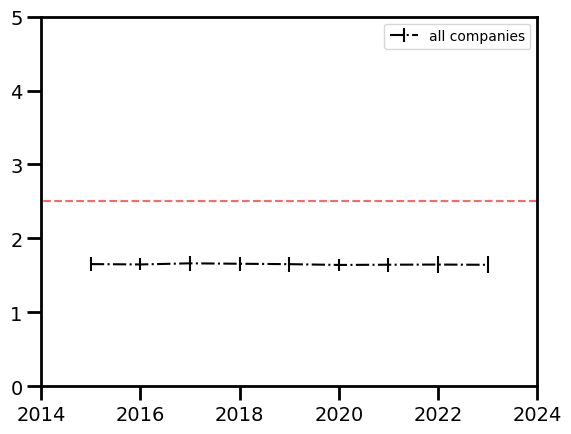

In [105]:
plt.errorbar(years, avg_concr, yerr=2*std_concr, ls='-.', label="all companies", color='black')
plt.hlines(2.5, 2000, 2030, color='r', ls='--', alpha=0.6)
plt.ylim(0,5)
plt.xlim(2014,2024)
plt.legend()
plt.show()

In [106]:
mk.original_test(avg_concr)

Mann_Kendall_Test(trend='no trend', h=False, p=0.07633274037635718, z=-1.7723725194851356, Tau=-0.5, s=-18.0, var_s=92.0, slope=-0.0017187428952587145, intercept=1.654611865790617)

#### Per-sector

In [130]:
avg_concr_per_sec=np.zeros((len(agg_secs.keys()), len(years)))
std_concr_per_sec=np.zeros((len(agg_secs.keys()), len(years)))

for i_y, year in enumerate(years):
    output_y=output[output['year']==year]
    for agg_sec_key in agg_secs.keys():
        index=ord(agg_sec_key)-ord('A')
        mysecs=agg_secs[agg_sec_key]['sectors']
        
        myout=output_y[np.isin(output_y['sector'], mysecs)]['concreteness']
        avg_concr_per_sec[index, i_y]=np.mean(myout)
        std_concr_per_sec[index, i_y]=np.std(myout)

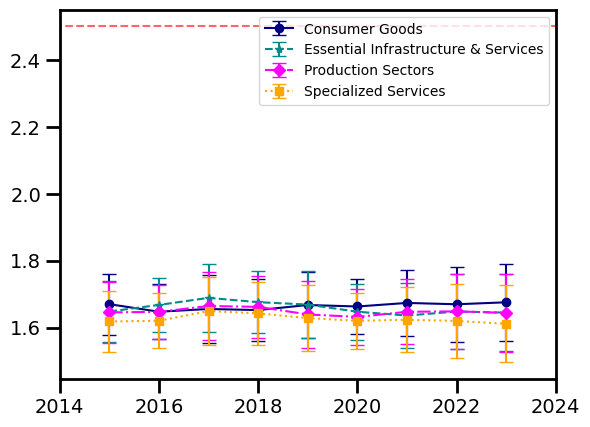

In [136]:
for agg_sec_key in agg_secs.keys():
    agg_sec_info=agg_sec_plots[agg_sec_key]
    index=ord(agg_sec_key)-ord('A')
    plt.errorbar(years, avg_concr_per_sec[index], yerr=2*std_concr, label=agg_secs[agg_sec_key]['name'], **agg_sec_info, capsize=5 )
#plt.errorbar(years, avg_concr, yerr=2*std_concr, ls='-.', label="all companies", color='black')
plt.hlines(2.5, 2000, 2030, color='r', ls='--', alpha=0.6)
#plt.ylim(0,5)
plt.xlim(2014,2024)
plt.legend()
plt.show()

In [169]:
y2

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

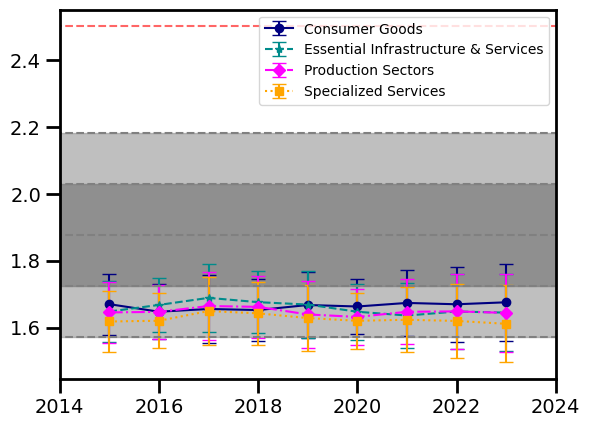

In [174]:
for agg_sec_key in agg_secs.keys():
    agg_sec_info=agg_sec_plots[agg_sec_key]
    index=ord(agg_sec_key)-ord('A')
    plt.errorbar(years, avg_concr_per_sec[index], yerr=2*std_concr, label=agg_secs[agg_sec_key]['name'], **agg_sec_info, capsize=5 )
    
plt.hlines(np.mean(wiki_concr)+2*np.std(wiki_concr), 2000, 2030, color='gray', ls='--')
plt.hlines(np.mean(wiki_concr)+np.std(wiki_concr), 2000, 2030, color='gray', ls='--')
plt.hlines(np.mean(wiki_concr)-np.std(wiki_concr), 2000, 2030, color='gray', ls='--')
plt.hlines(np.mean(wiki_concr)-2*np.std(wiki_concr), 2000, 2030, color='gray', ls='--')
plt.hlines(np.mean(wiki_concr), 2000, 2030, color='gray', ls='--')

y1 = np.ones(len(range(2000, 2030)))*(np.mean(wiki_concr)-2*np.std(wiki_concr))
y2 = np.ones(len(range(2000, 2030)))*(np.mean(wiki_concr)+2*np.std(wiki_concr))

plt.fill_between(np.arange(2000, 2030), y1, y2, color="gray", alpha=0.5)
plt.fill_between(np.arange(2000, 2030), y1+np.std(wiki_concr), y2-np.std(wiki_concr), color="gray", alpha=0.75)
plt.hlines(2.5, 2000, 2030, color='r', ls='--', alpha=0.6)
#plt.ylim(0,5)
plt.xlim(2014,2024)
plt.legend()
plt.show()

#### SDGs

In [279]:
sdg_color_list = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:olive',
    'tab:cyan',
    'darkblue',
    'gold',
    'crimson',
    'darkgreen',
    'darkorange',
    'deeppink',
    'firebrick',
]
# by ChatGPT

In [280]:
sdg_helper

{'01': 'No Poverty',
 '02': 'Zero hunger',
 '03': 'Good health and well-being',
 '04': 'Quality education',
 '05': 'Gender equality',
 '06': 'Clean water and sanitation',
 '07': 'Affordable and clean energy',
 '08': 'Decent work and economic growth',
 '09': 'Industry, Innovation, Technology and Infrastructure',
 '10': 'Reduced inequality',
 '11': 'Sustainable cities and communities',
 '12': 'Responsible consumption and production',
 '13': 'Climate action',
 '14': 'Life below water',
 '15': 'Life on land',
 '16': 'Peace, justice and strong institutions',
 '17': 'Partnerships for the goals'}

In [281]:
labels=['SDG'+key+': '+value for key, value in sdg_helper.items()]

In [282]:
short_labels=['SDG'+key for key, value in sdg_helper.items()]

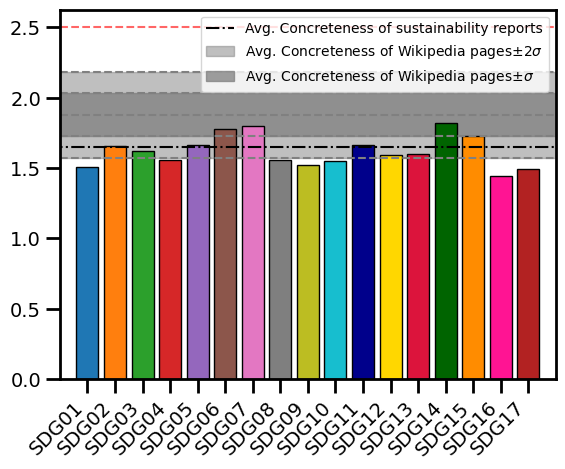

In [283]:
plt.hlines(np.mean(wiki_concr)+2*np.std(wiki_concr), 0, 18, color='gray', ls='--')
plt.hlines(np.mean(wiki_concr)+np.std(wiki_concr), 0, 18, color='gray', ls='--')
plt.hlines(np.mean(wiki_concr)-np.std(wiki_concr), 0, 18, color='gray', ls='--')
plt.hlines(np.mean(wiki_concr)-2*np.std(wiki_concr), 0, 18, color='gray', ls='--')
plt.hlines(np.mean(wiki_concr), -2, 18, color='gray', ls='--')

plt.hlines(np.mean(avg_concr), -2, 18, color='black', ls='-.', label=r'Avg. Concreteness of sustainability reports')

y1 = np.ones(len(range(20)))*(np.mean(wiki_concr)-2*np.std(wiki_concr))
y2 = np.ones(len(range(20)))*(np.mean(wiki_concr)+2*np.std(wiki_concr))

plt.fill_between(np.arange(20), y1, y2, color="gray", alpha=0.5, label=r'Avg. Concreteness of Wikipedia pages$\pm2\sigma$')
plt.fill_between(np.arange(20), y1+np.std(wiki_concr), y2-np.std(wiki_concr), color="gray", alpha=0.75, label=r'Avg. Concreteness of Wikipedia pages$\pm\sigma$')
plt.hlines(2.5, -2, 20, color='r', ls='--', alpha=0.6)

plt.bar(np.arange(1, 18), fafas_concr, color=sdg_color_list, edgecolor='black')

plt.xlim(0,18)
plt.xticks(np.arange(1, 18), labels=short_labels, rotation=45,ha="right")
plt.legend()
plt.show()

# Length vs. concreteness

## Wikipedia

In [243]:
wiki_len=np.zeros(len(wiki_texts_files))
for i_f, file in enumerate(tqdm(wiki_texts_files)):
    with open(WIKI_TEXT_FOLDER+file, 'r') as f:
        _text=f.readline()
    wiki_len[i_f]=len(_text)

  0%|          | 0/4001 [00:00<?, ?it/s]

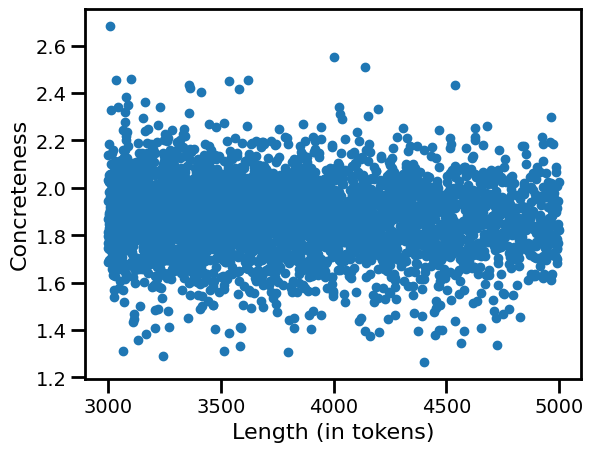

In [246]:
plt.scatter(wiki_len, wiki_concr)
plt.xlabel('Length (in tokens)', fontsize=16)
plt.ylabel('Concreteness', fontsize=16)
plt.show()

## Reports

In [247]:
l_reports=np.zeros(len(textfiles))
for i_tf, textfile in enumerate(tqdm(textfiles)):
    with open(TEXT_FOLDER+textfile, 'r') as f:
        _text=f.readline()
    l_reports[i_tf]=len(_text)

  0%|          | 0/573 [00:00<?, ?it/s]

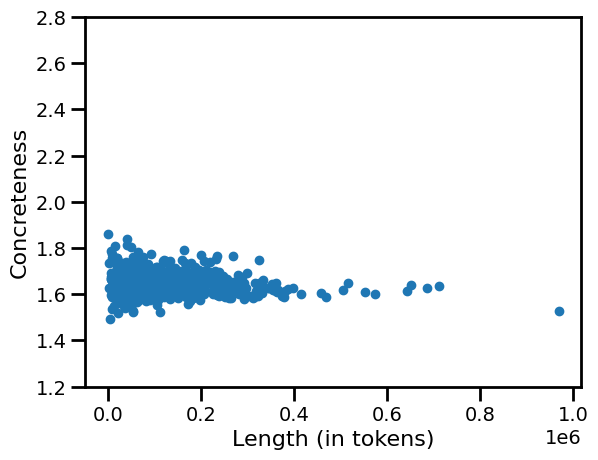

In [250]:
plt.scatter(l_reports, output['concreteness'])
plt.xlabel('Length (in tokens)', fontsize=16)
plt.ylabel('Concreteness', fontsize=16)
plt.ylim(1.2, 2.8)
plt.show()

In [294]:
spearmanr(l_reports, output['concreteness'])

SignificanceResult(statistic=-0.11916525115743107, pvalue=0.004283886047920487)

### Is it due to the length of the documents?

In [297]:
bins = np.linspace(l_reports.min(), l_reports.max(), 15)

In [298]:
digitized = np.digitize(l_reports, bins)

In [299]:
variances = [output['concreteness'][digitized == i].var() for i in range(1, len(bins))]

/tmp/ipykernel_9742/2349495271.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  variances = [output['concreteness'][digitized == i].var() for i in range(1, len(bins))]
/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [300]:
len_var = np.array([len(output['concreteness'][digitized == i])/len(output['concreteness']) for i in range(1, len(bins))])

In [301]:
bin_centers = 0.5 * (bins[:-1] + bins[1:])

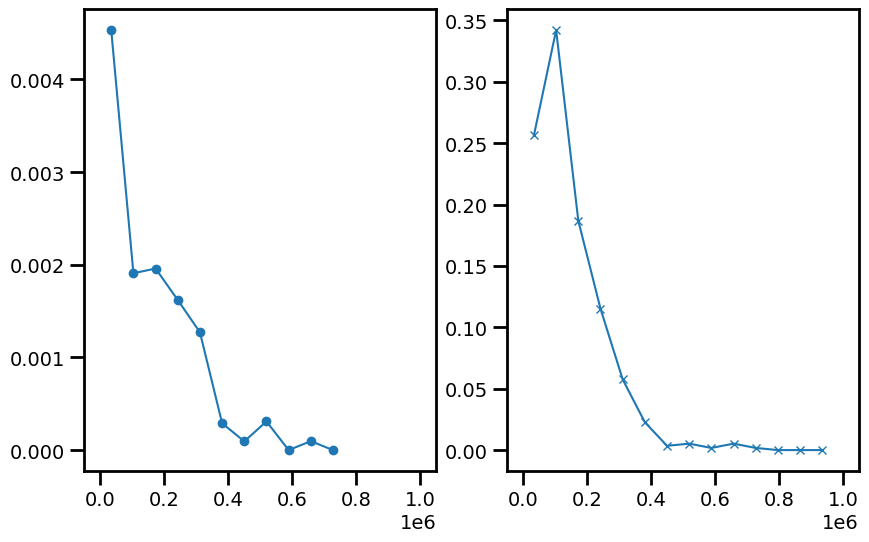

In [302]:
fig, axs=plt.subplots(1,2, figsize=(10,6))
axs[0].plot(bin_centers, variances, marker='o')
axs[0].set_xlim(-.05*10**6, 1.05*10**6)

axs[1].plot(bin_centers, len_var, marker='x')
axs[1].set_xlim(-.05*10**6, 1.05*10**6)
plt.show()

In [303]:
ks_pvals=[]
for i in range(1, len(bins)):
    sliced_distribution=output['concreteness'][digitized == i]
    if len(sliced_distribution)>0:
        stat, pval = ks_2samp(output['concreteness'], sliced_distribution)
        print(f'{i}) stat={stat:.3f}, pval={pval:.2e}')
        ks_pvals.append(pval)

1) stat=0.099, pval=1.90e-01
2) stat=0.075, pval=3.66e-01
3) stat=0.040, pval=9.97e-01
4) stat=0.089, pval=7.01e-01
5) stat=0.202, pval=1.35e-01
6) stat=0.483, pval=2.99e-03
7) stat=0.812, pval=7.27e-02
8) stat=0.436, pval=5.00e-01
9) stat=0.855, pval=2.93e-01
10) stat=0.543, pval=2.45e-01
11) stat=0.557, pval=8.89e-01


In [307]:
fdr_005_ks_pvals=fdr(ks_pvals, 0.05)

In [309]:
f'{fdr_005_ks_pvals:.2e}'

'4.55e-03'

## Fast Facts

In [286]:
fafas_l=np.zeros(17)
for i_f, file in enumerate(tqdm(fafas_texts_files[:-1])):
    index=file.split('-')[1]
    index=int(index.split('_')[0])-1
    with open(BENCHMARK_FOLDER+file, 'r') as f:
        _text=f.read()
    _text=first_text_cleaner(_text)
    fafas_l[index]=len(_text)

  0%|          | 0/17 [00:00<?, ?it/s]

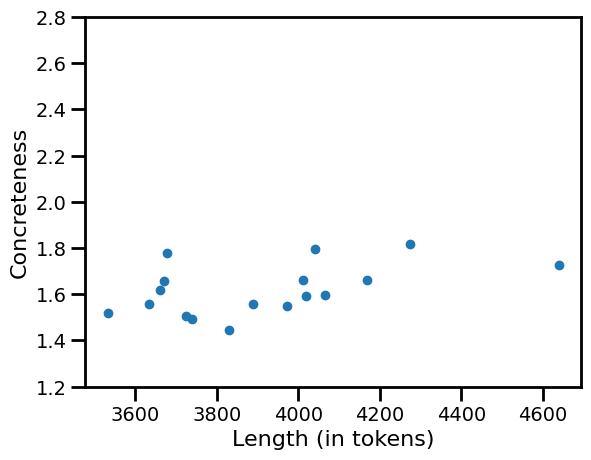

In [289]:
plt.scatter(fafas_l, fafas_concr)
plt.xlabel('Length (in tokens)', fontsize=16)
plt.ylabel('Concreteness', fontsize=16)
plt.ylim(1.2, 2.8)
plt.show()

In [292]:
mk.original_test(fafas_concr[np.argsort(fafas_l)])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0356564176022276, z=2.100824014157668, Tau=0.38235294117647056, s=52.0, var_s=589.3333333333334, slope=0.012210375636428555, intercept=1.501167007343499)

In [295]:
spearmanr(fafas_l,fafas_concr)

SignificanceResult(statistic=0.5000000000000001, pvalue=0.040968955955836106)

# Cosine against Wiki vs. concreteness

In [310]:
with open('./NewProcessedData/Data2BXported/reports_vs_wikipedia.pickle', 'rb') as f:
    rep_wiki=pickle.load(f)

In [311]:
rep_wiki.shape

(573, 4001)

In [313]:
mean_cos_wiki=np.mean(rep_wiki, axis=1)

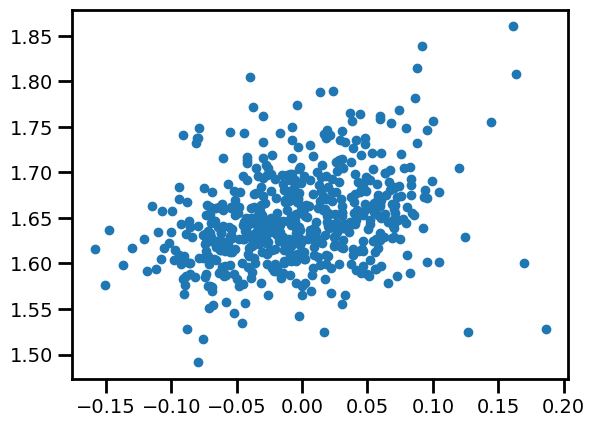

In [315]:
plt.scatter(mean_cos_wiki, output['concreteness'])
plt.show()

In [316]:
spearmanr(mean_cos_wiki, output['concreteness'])

SignificanceResult(statistic=0.30568543957638583, pvalue=7.367429178724005e-14)